# Understanding ACDCs: Authentic Chained Data Containers

<div class="alert alert-primary">
  <b>🎯 OBJECTIVE</b><hr>
    Introduces the concept of Authentic Chained Data Containers (ACDCs). Explore what they are, their basic structure, how they are connected to key event logs (KELs), and why they are a secure way to share information.
</div>

## Defining ACDCs

In KERI, verifiable claims are exchanged using **Authentic Chained Data Containers**, **ACDCs** for short. An ACDC is like a digital envelope that's been cryptographically sealed and tied to the key event log (KEL) of an identity. You can put data inside (like a name, an authorization, or a membership status), and the seal guarantees who created it and that the contents haven't been tampered with since it was sealed. The tie to the KEL of an AID, also known as an anchor or anchoring, provides the cryptographic verifiability and authenticity (who) for a credential.

A feature of ACDCs is that they allow different parties (represented by their AIDs) to securely share and verify pieces of information or claims about themselves or others. They are KERI's secure implementation of the broader concept of Verifiable Credentials (VCs). 

<div class="alert alert-info">
<b>ℹ️ NOTE: We don't sign credentials, and you shouldn't either!</b><hr>
<p>The security model of an ACDC is provided by a tie to a key event in a key event log, also known as a seal. This seal is then placed in a key event, whether an interaction or rotation event, in a process called "anchoring."</p>
<p>What this means is that ACDCs are not signed directly, rather the seal is signed, and the seal that anchors the ACDC to a particular key event provides the cryptographic verifiability for that ACDC. <b>Critically</b>, this seal allows verification of the ACDC <em>even after rotating the keys</em> of the underlying identifier that issued the ACDC.</p>
<p>In fact, signing an ACDC would not be terribly useful because a signature of an ACDC that is not anchored to a KEL would only be useful until the keys of the underlying signing identifier were rotated. This means that a bare signature of an ACDC would not, on its own, provide a secure, reproducible verification of that ACDC because it is missing a key index and thus, when the underlying issuing identifier rotates keys, would become unverifiable, assuming that the verifier always demands the use of the most current keys for an issuer that it knows about.</p>
<p>If this doesn't make a lot of sense yet that's okay. The note is included here for reference and to stimluate your thinking and further questioning.</p>
</div>

## SAIDs: Self-Addressing Identifiers

ACDCs rely on the concept of **Self-Addressing Identifiers (SAIDs)** to create identifiers for data. The SAID is generated by hashing the content it represents, after placing '###' characters as a placeholder for the SAID attribute in the data, and finally embedding the SAID within the data it is a digest of, making the data and its identifier mutually tamper-evident. SAIDs are a crucial part of ACDCs and will be presented later in the definition of credential schemas. 

## ACDC Structure: Envelope and Payload

Conceptually, an ACDC has two parts, the envelope and the payload. Both are shown together in the following example of a vLEI QVI credential. 

### Sample ACDC - a QVI credential

This sort of credential is issued to an organization who has been approved to issue vLEI credentials. In this example the rule attributes are abbreviated.

```json
{
  "v": "ACDC10JSON000521_",
  "d": "EAj8mVqmr-mb6_sSagoy-GwEQdBlkPUHVkXjilAFBe1p",
  "i": "EN6zbvE2f8-FWP9bcYOknYXnZrCnmMS6Ot2ctYEtXIV7",
  "ri": "EBYWGQLsUB1q1MaD5Ub9eVP10LIk071FoxSvZPYyKVDu",
  "s": "EBfdlu8R27Fbx-ehrqwImnK-8Cm79sqbAQ4MmvEAYqao",
  "a": {
    "d": "EEaFWpwcg78La7agmlpklLlNADl4emfS9J71WFIxId8W",
    "i": "EOc_QXByf6e-4_q80tG4Kay-MOw2GYqkbiifvepIYmKi",
    "dt": "2025-06-11T21:26:59.963634+00:00",
    "LEI": "254900OPPU84GM83MG36"
  },
  "r": {
    "d": "EDIai3Wkd-Z_4cezz9nYEcCK3KNH5saLvZoS_84JL6NU",
    "usageDisclaimer": {
      "l": "Usage of a valid, unexpired, and non-revoked vLEI Credential..."
    },
    "issuanceDisclaimer": {
      "l": "All information in a valid, unexpired, and non-revoked..."
    }
  }
}
```

Let's break this down.

### Envelope

**The Envelope** consists of a few top-level fields in the ACDC object *about* the ACDC itself.

```json
{
  "v": "ACDC10JSON000521_",
  "d": "EAj8mVqmr-mb6_sSagoy-GwEQdBlkPUHVkXjilAFBe1p",
  "i": "EN6zbvE2f8-FWP9bcYOknYXnZrCnmMS6Ot2ctYEtXIV7",
  "ri": "EBYWGQLsUB1q1MaD5Ub9eVP10LIk071FoxSvZPYyKVDu",
  "s": "EBfdlu8R27Fbx-ehrqwImnK-8Cm79sqbAQ4MmvEAYqao",
  ...payload fields
}
```

These fields are:
* `v`: Specifies the version and serialization format (like JSON or CBOR).
* `d`: The unique identifier for *this specific ACDC instance*. This is a SAID
* `i`: The AID (Autonomic Identifier) of the entity that *issued* the ACDC.
* `s`: The SAID of the *Schema* that defines the structure and rules for the data inside this ACDC.

### Payload

**The Payload** contains the data of the credential in three main parts. In this sample the rules attributes are abbreviated.

```json
{
  ...metadata fields
  "a": {
    "d": "EEaFWpwcg78La7agmlpklLlNADl4emfS9J71WFIxId8W",
    "i": "EOc_QXByf6e-4_q80tG4Kay-MOw2GYqkbiifvepIYmKi",
    "dt": "2025-06-11T21:26:59.963634+00:00",
    "LEI": "254900OPPU84GM83MG36"
  },
  "r": {
    "d": "EDIai3Wkd-Z_4cezz9nYEcCK3KNH5saLvZoS_84JL6NU",
    "usageDisclaimer": {
      "l": "Usage of a valid, unexpired, and non-revoked vLEI Credential..."
    },
    "issuanceDisclaimer": {
      "l": "All information in a valid, unexpired, and non-revoked..."
    }
  }
}
```

The fields are:
* `a` (Attributes): The core data or claims being made (e.g., name: "Alice", role: "Admin")
* `e` (Edges): Optional links to *other* ACDCs, creating verifiable chains of credentials 
* `r` (Rules): Optional machine-readable rules or references to legal agreements (like Ricardian Contracts) associated with the credential

The example shown above does not have any edges, links to other ACDCs, and thus has no "e" section. A credential with any chain to other credentials would have edges and thus data in the "e" section.

## ACDCs Security and Verifiability

ACDCs leverage KERI's core security principles to provide strong guarantees:

* **Authenticity:** Every ACDC is digitally signed by its issuer (`i` field). Using the issuer's KEL (Key Event Log), anyone can verify that the issuer actually created and authorized that specific ACDC.
* **Integrity:** The ACDC's own identifier (`d` field) is a SAID. This means the identifier is a cryptographic hash (digest) of the ACDC's contents. If anything in the ACDC changes (even a single character), the SAID will no longer match, proving it has been tampered with.
* **Schema Verification:** The schema defining the ACDC's structure is also identified by a SAID (`s` field). This ensures that everyone agrees on the structure and rules the credential must follow, and that the schema itself hasn't been tampered with.
* **End-Verifiability:** Like all things in KERI, ACDCs are designed to be verifiable by anyone who receives them, relying only on the ACDC itself and the issuer's KEL, without needing to trust intermediaries.

These features make ACDCs a robust foundation for building trustable digital interactions, from simple claims to complex authorization workflows.

Now that you understand the basic concept of an ACDC, the next step is to learn how to define its structure using **schemas**. In the next notebook, we'll dive into creating ACDC schemas and making them verifiable with SAIDs.

## How an ACDC is Connected to an AID

An ACDC connects to an AID by anchoring events from a transaction event log, a TEL, for the creation of the registry a credential is issued from as well as the issuance of the credential itself. This is shown in the below diagram.

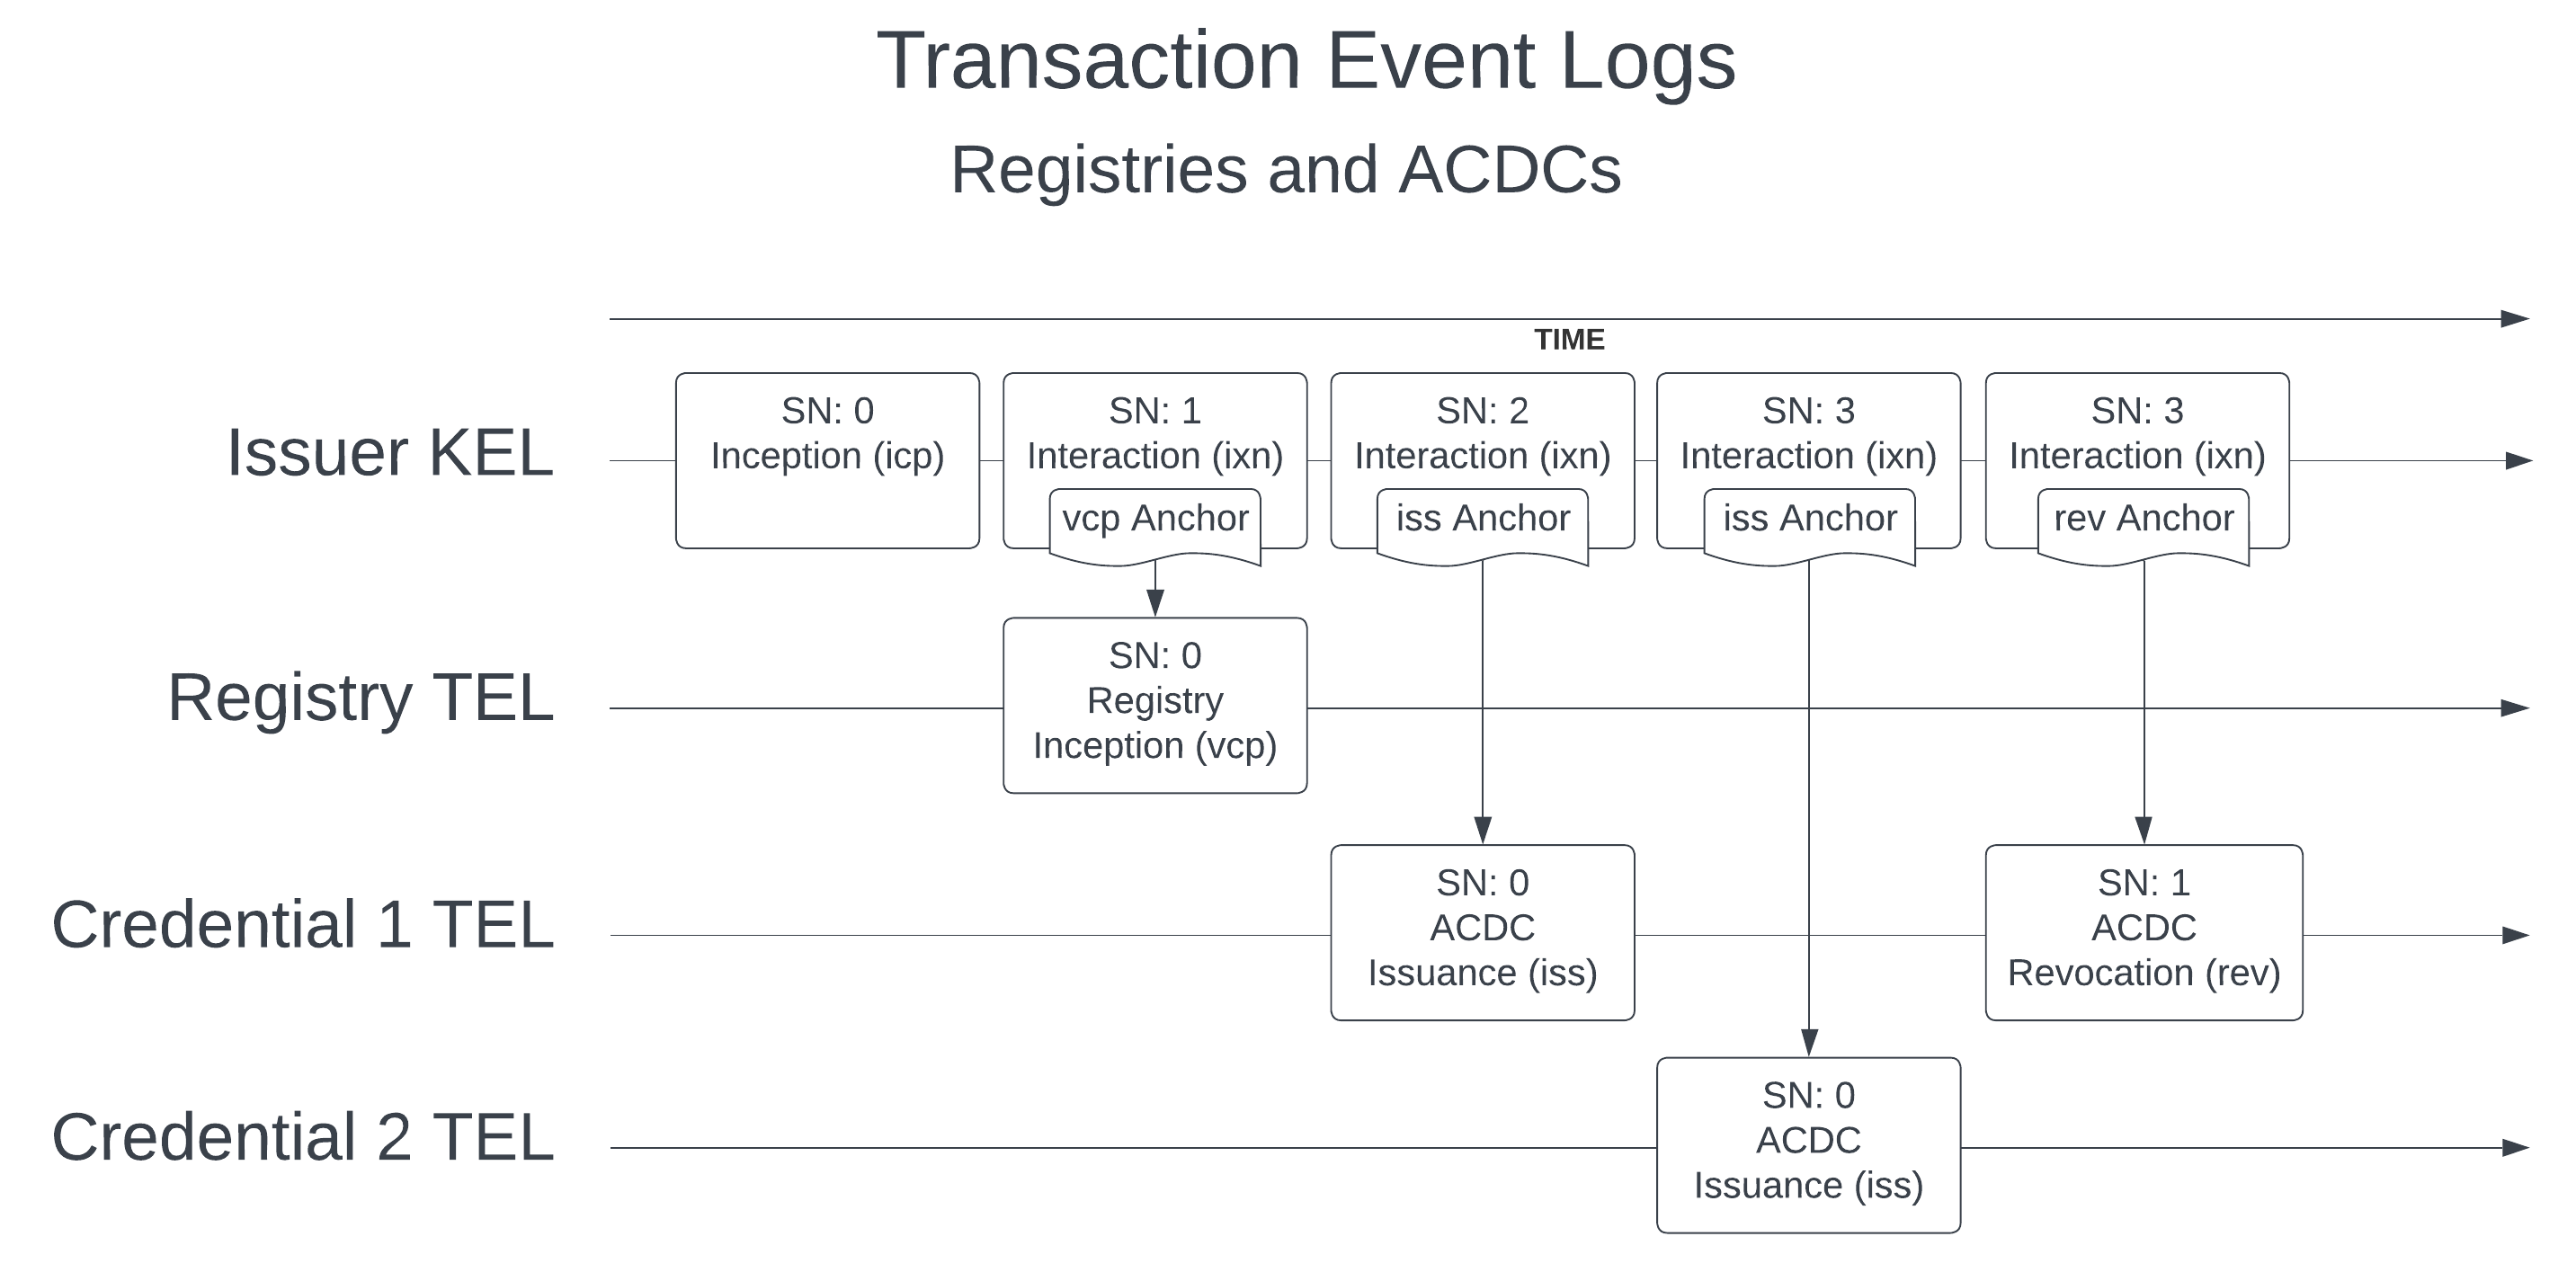


### Connecting regstries and ACDCs to the KEL

First, before issuing an ACDC the issuer must create an ACDC registry. Since each ACDC has a reference back to the registry the ACDC was issued from then the registry must exist first. Following registry creation the issuer may issue credentials as shown in the diagram above. Transaction Event Logs (TELs) are used to anchor both registries and ACDCs to a KEL. This process is called "anchoring" and provides cryptographic verifiability to the registry and any ACDCs issued.

### ACDC Registries and its Anchor

This registry will have a SAID identifier like `ELh3eYC2W_Su1izlvm0xxw01n3XK8bdV2Zb09IqlXB7A` like is shown in the below registry inception event, a `vcp` event. The below example shows both a registry creation event (`vcp` for verifiable registry inception) and its anchoring seal, the CESR event stream that looks like `-GAB0AAAAAAAAAAAAAAAAAAAAABwEOWdT7a7fZwRz0jiZ0DJxZEM3vsNbLDPEUk-ODnif3O0`. The CESR stream below is spaced out and annotated for readability. All cryptographic signatures in KERI and ACDC are expressed as CESR streams.

```json
{ 
    "v" : "KERI10JSON00011c_", 
    "i" : "ELh3eYC2W_Su1izlvm0xxw01n3XK8bdV2Zb09IqlXB7A", 
    "ii": "EJJR2nmwyYAfSVPzhzS6b5CMZAoTNZH3ULvaU6Z-i0d8", 
    "s" : "0", 
    "t" : "vcp", 
    "b" : ["BbIg_3-11d3PYxSInLN-Q9_T2axD6kkXd3XRgbGZTm6s"], 
    "c" : [] 
    "a" : { 
        "d": "EEBp64Aw2rsjdJpAR0e2qCq3jX7q7gLld3LjAwZgaLXU" 
    } 
}
-GAB                                           # CESR attachment group code for the TEL anchor
  0AAAAAAAAAAAAAAAAAAAAABw                     # KEL seq. no. of the anchoring interaction event. All 'A's = 0 in Base64, the first 'B' means "1".
  EOWdT7a7fZwRz0jiZ0DJxZEM3vsNbLDPEUk-ODnif3O0 # SAID of KEL event anchroing this "vcp" event.
```

### ACDC Issuance and its Anchor

An issuance in a TEL includes the digest of the ACDC that was issued in the "i" field and also points to the registry the ACDC was issued from in the "ri" field, what [will become](https://trustoverip.github.io/tswg-acdc-specification/#top-level-fields) the "rd" field.

```json
{ 
    "v" : "KERI10JSON00011c_", 
    "i" : "Ezpq06UecHwzy-K9FpNoRxCJp2wIGM9u2Edk-PLMZ1H4", 
    "s" : "0", 
    "t" : "iss", 
    "dt": "2021-05-27T19:16:50.750302+00:00", 
    "ri": "ELh3eYC2W_Su1izlvm0xxw01n3XK8bdV2Zb09IqlXB7A" 
}
-GAB
  0AAAAAAAAAAAAAAAAAAAAAAw
  ELvaU6Z-i0d8JJR2nmwyYAZAoTNZH3UfSVPzhzS6b5CM 
```

### ACDC Revocation and its Anchor

Somewhat different from an issuance, the TEL event for a revocation points back to the "iss" issuance event with the "p" property, to the ACDC with the "i", property, and contains a date and timestamp for when the revocation occurred.

```json
{ 
    "v" : "KERI10JSON00011c_", 
    "i" : "Ezpq06UecHwzy-K9FpNoRxCJp2wIGM9u2Edk-PLMZ1H4", 
    "s" : "1", 
    "t" : "rev", 
    "dt": "2021-05-27T19:16:50.750302+00:00", 
    "p" : "EY2L3ycqK9645aEeQKP941xojSiuiHsw4Y6yTW-PmsBg" 
}
-GAB
  0AAAAAAAAAAAAAAAAAAAAABA
  ELvaU6Z-i0d8JJR2nmwyYAZAoTNZH3UfSVPzhzS6b5CM
```

<div class="alert alert-primary">
  <b>📝 SUMMARY</b><hr>
    Authentic Chained Data Containers (ACDCs) are KERI's version of verifiable credentials, acting as cryptographically sealed envelopes for sharing verifiable claims. They rely on Self-Addressing Identifiers (SAIDs)—unique IDs derived from the content itself—to ensure integrity. In order to issue an ACDC a registry must be created. Both the creation of a registry and the creation of an ACDC involve creation of separate transaction event logs (TELs). A registry has its own TEL to record when the registry was created and the changing of any registry backers. Each ACDC has its own TEL to record the issuance and revocation state of the ACDC.
<br/><br/>
    
An ACDC consists of an 'Envelope' with metadata (like version v, its own SAID d, issuer AID i, and schema SAID s) and a 'Payload' containing the actual data (attributes a), optional links to other ACDCs (edges e), and optional rules (r). ACDCs provide authenticity via the issuer's signature, integrity through their SAID, schema verification via the schema's SAID, and are end-verifiable using the issuer's KEL.
</div>